### <font color=black> IMPORT:: <font color=blue> **py modules** </font> </font>

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
#
%matplotlib inline
# %matplotlib notebook
#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
#
# PD=os.getcwd(); PD


In [2]:
var='sea_level_change'
yr=np.arange(0,15); #print(yr)
pathG='/scratch/pk695/FACTS/NZrerun-pk695/GREGS_data2NZ/low_confidence/ssp126/verticallandmotion_ssp126_low_confidence_values.nc'
pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/006_confidence_output_files/low_confidence/ssp126/verticallandmotion_ssp126_low_confidence_values.nc'
d_ncG=xr.open_dataset(pathG);  
d_ncP=xr.open_dataset(pathP)

# labels
EXP_G=pathG.split('/')[5].split('_')[0]
EXP_P=pathP.split('/')[4].split('-')[1]
EXP_file=pathG.split('/')[-1]

In [3]:
# d_ncP

In [4]:
# Find the common locations
idx=0
# latG=np.round(d_ncG['lat'][idx].values,4); lonG=np.round(d_ncG['lon'][idx].values,4)
latG=d_ncG['lat'][idx].values; lonG=d_ncG['lon'][idx].values
latP=d_ncP['lat'][idx].values; lonP=d_ncP['lon'][idx].values
print('lonP=',lonP,'latP=',latP,)
print('lonG=',lonG,'latG=',latG,)
print( '\n' )
print('d_ncG=',d_ncG[var].shape)
print('d_ncP=',d_ncP[var].shape)
print( '\n' )
print('years d_ncG=',d_ncG['years'][yr].values)
print('years d_ncP=',d_ncP['years'][yr].values)

lonP= 173.11751 latP= -34.740926
lonG= 173.11751 latG= -34.740926


d_ncG= (107, 30, 7435)
d_ncP= (107, 15, 7435)


years d_ncG= [2005 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140
 2150]
years d_ncP= [2005 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140
 2150]


### <font color=blue> PLOT:: <font color=red> **1D Slice** </font>

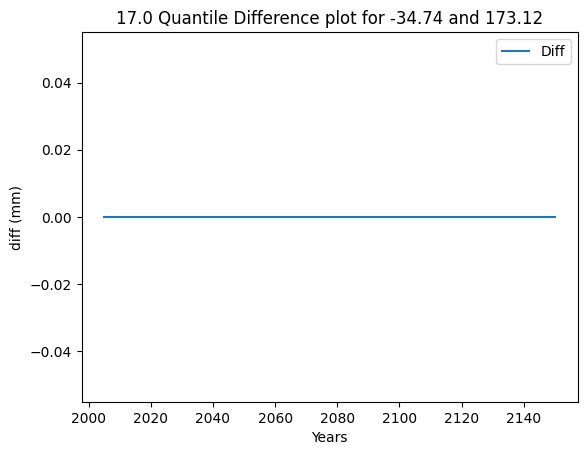

In [5]:
quant=20         #quantile 20,50
loc=0           #loc

slcG=d_ncG[var][quant,yr,loc]
slcP=d_ncP[var][quant,yr,loc]
diff=slcG-slcP
# print(diff)

latP=d_ncP['lat'][loc].values
lonP=d_ncP['lon'][loc].values

xx=d_ncP['years'][yr].values
yy1=diff

plt.plot(xx, yy1, label='Diff')

plt.xlabel('Years'); plt.ylabel('diff (mm)')

LAT=str(np.round(latP,2)); LON=str(np.round(lonP,2))
QUANT=str(d_ncP['quantiles'][quant].values*100)


plt.title(QUANT+' Quantile Difference plot for '+LAT+' and '+LON)

plt.legend()
plt.show()

### <font color=blue> PLOT:: <font color=red> **2D Slice** </font>

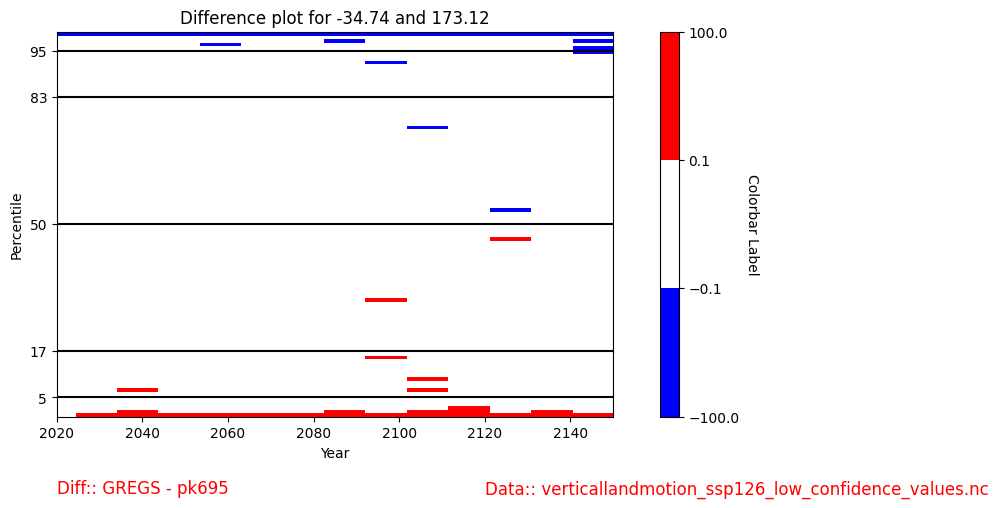

In [6]:
quant=np.arange(0,d_ncG[var].shape[0])         #quantile
loc=0           #loc

slcG=d_ncG[var][quant,yr,loc]
slcG2D=d_ncG[var][quant,yr,loc].values
slcP2D=d_ncP[var][quant,yr,loc].values
diff2D = slcG2D - slcP2D


xx=d_ncP['years'][yr].values
yy=d_ncP['quantiles'][quant].values*100
zz=diff2D

# Define the color boundaries and colors for the colormap
bounds = [-100, -0.1, 0.1, 100]
colors = ['blue', 'white', 'red']

# Create the colormap and normalization object
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, len(colors))

fig, ax = plt.subplots(figsize=(12,5))
im = ax.imshow(zz, extent=[xx.min(), xx.max(), yy.min(), yy.max()], cmap=cmap, norm=norm)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Colorbar Label', rotation=-90, va="bottom")
ax.set_aspect(0.9)
ax.set_xlabel('Year')
ax.set_ylabel('Percentile')
ax.set_title('Difference plot for '+LAT+' and '+LON)
ax.set_xlim(2020, 2150)
ax.set_ylim(0, 100)

y_values = np.array([5, 17, 50, 83, 95])
for val in y_values:
    plt.axhline(y=val, color = 'k', linestyle = '-')
plt.yticks(y_values)

plt.text(2120, -20, 'Data:: '+EXP_file, fontsize=12, color='red')
plt.text(2020, -20, 'Diff:: '+EXP_G+' - '+ EXP_P,fontsize=12, color='red')

plt.show()

### <font color=blue> PLOT:: <font color=red> **3D Slice** </font>

In [7]:
# ptile=[5,17,50,83,95]
# for ii in ptile:
#     value_of_17 = XX[(XX == ii).argmax()]
#     print(value_of_17,' index',(XX == ii).argmax())

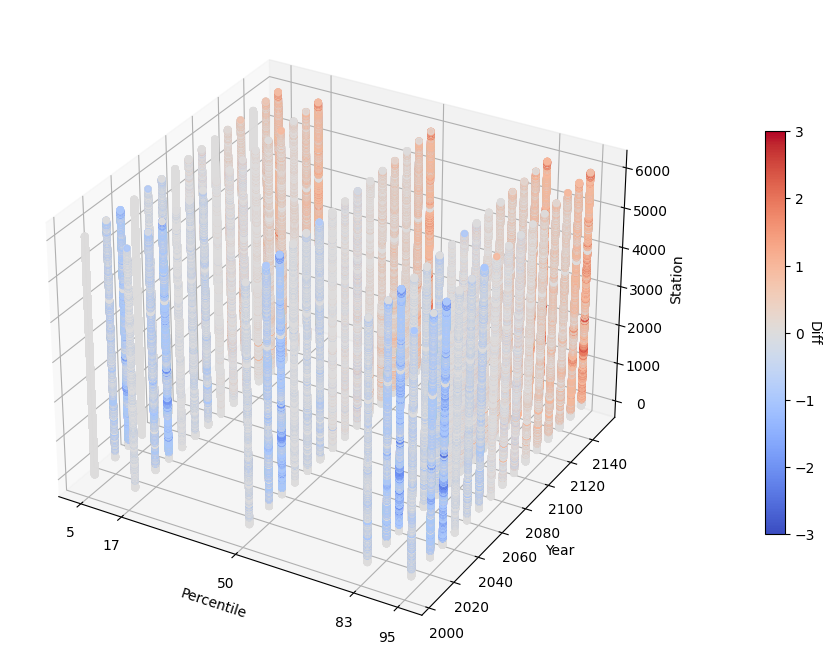

In [8]:
stn= np.arange(4,6000)
qquant=[5,17,50,83,95]
quant=[7,20,53,86,99]#np.arange(0,d_ncG[var].shape[0])         #quantile
loc=0           #loc

slcG3D=d_ncG[var][quant,yr,stn].values
slcP3D=d_ncP[var][quant,yr,stn].values
diff3D = slcG3D - slcP3D

XX=d_ncG['quantiles'][quant].values*100
YY=d_ncG['years'][yr].values
ZZ=np.arange(diff3D.shape[2])
VAR=diff3D

x, y, z = np.meshgrid(XX, YY, ZZ)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
PP=ax.scatter3D(x.flatten(), y.flatten(), z.flatten(), c=VAR.flatten(), cmap='coolwarm')
ax.set_xlabel('Percentile')
ax.set_ylabel('Year'); #ax.set_yticks(rotation=90)
ax.set_zlabel('Station')
ax.set_xticks(qquant)
# fig.colorbar(PP)
cbar=plt.colorbar(PP,fraction=0.026, pad=0.14)
# plt.show()
cbar.set_label('Diff', rotation=270)

